In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import re
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/3year.csv
/kaggle/input/2year.csv
/kaggle/input/1year.csv
/kaggle/input/5year.csv
/kaggle/input/4year.csv


Load 5 years data and stored in variable called df1,df2,df3,df4 and df5 respectively

In [94]:
df1 = pd.read_csv("../input/1year.csv")
df2 = pd.read_csv("../input/2year.csv")
df3 = pd.read_csv("../input/3year.csv")
df4 = pd.read_csv("../input/4year.csv")
df5 = pd.read_csv("../input/5year.csv")

Exploratory Data Analysis report generated. Report reveal that there are special character in the dataset and shoulb be replaced with zero, most of the variables are skewed in nature

In [ ]:
profile = ProfileReport(df1, html = {'style' : {'full_width': True} })
profile.to_file(output_file="df1_output_min.html")

profile_df2 = ProfileReport(df2, html = {'style' : {'full_width': True} })
profile_df2.to_file(output_file="df2_output_min.html")

profile_df3 = ProfileReport(df3, html = {'style' : {'full_width': True} })
profile_df3.to_file(output_file="df3_output_min.html")

profile_df4 = ProfileReport(df4, html = {'style' : {'full_width': True} })
profile_df4.to_file(output_file="df4_output_min.html")

profile_df5 = ProfileReport(df5, html = {'style' : {'full_width': True} })
profile_df5.to_file(output_file="df5_output_min.html")



Special character in the datset is "?" is replaced with zero in the following code

In [95]:
df1=df1.replace('\?',0,regex=True).astype(float)
df2=df2.replace('\?',0,regex=True).astype(float)
df3=df3.replace('\?',0,regex=True).astype(float)
df4=df4.replace('\?',0,regex=True).astype(float)
df5=df5.replace('\?',0,regex=True).astype(float)

Regenerate the Profile report after replacing the special character and converting to float values.

In [ ]:
profile = ProfileReport(df1, html = {'style' : {'full_width': True} })
profile.to_file(output_file="df1_output_min.html")

profile_df2 = ProfileReport(df2, html = {'style' : {'full_width': True} })
profile_df2.to_file(output_file="df2_output_min.html")

profile_df3 = ProfileReport(df3, html = {'style' : {'full_width': True} })
profile_df3.to_file(output_file="df3_output_min.html")

profile_df4 = ProfileReport(df4, html = {'style' : {'full_width': True} })
profile_df4.to_file(output_file="df4_output_min.html")

profile_df5 = ProfileReport(df5, html = {'style' : {'full_width': True} })
profile_df5.to_file(output_file="df5_output_min.html")

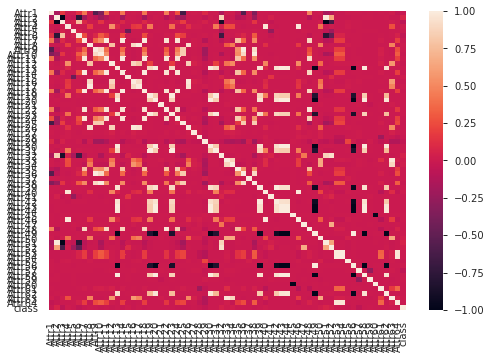

In [5]:
df1_cor = df1.corr()
sns.heatmap(df1_cor, 
        xticklabels=df1_cor.columns,
        yticklabels=df1_cor.columns)

From above correlation map reveals that there are many independent variables which are perfectly correlated with other variables, this may leads to multicolinearity problem. PCA used for feature extraction

In [86]:
pca = PCA(8)


In [87]:
df1_x = df1.drop(['class'], axis = 1)
df1_y = df1["class"]

df2_x = df2.drop(['class'], axis = 1)
df2_y = df2["class"]

df3_x = df3.drop(['class'], axis = 1)
df3_y = df3["class"]

df4_x = df4.drop(['class'], axis = 1)
df4_y = df4["class"]

df5_x = df5.drop(['class'], axis = 1)
df5_y = df5["class"]

Imbalance Data Handling using SMOTE or oversampling technique

In [99]:
sm = SMOTE(random_state=42)
df1_x,df1_y = (sm.fit_resample(df1_x, df1_y))
df2_x,df2_y = (sm.fit_resample(df2_x, df2_y))
df3_x,df3_y = (sm.fit_resample(df3_x, df3_y))
df4_x,df4_y = (sm.fit_resample(df4_x, df4_y))
df5_x,df5_y = (sm.fit_resample(df5_x, df5_y))

The dataet is highly imbalanced nature it should be handled specially.
https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/#:~:text=Dealing%20with%20imbalanced%20datasets%20entails,as%20it%20has%20wider%20application.

In [40]:
df1_x_pca =  pd.DataFrame(pca.fit_transform(df1_x))
df2_x_pca =  pd.DataFrame(pca.fit_transform(df2_x))
df3_x_pca =  pd.DataFrame(pca.fit_transform(df3_x))
df4_x_pca =  pd.DataFrame(pca.fit_transform(df4_x))
df5_x_pca =  pd.DataFrame(pca.fit_transform(df5_x))

In [36]:
def XGB_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y,test_size = 0.30,random_state = 101)                                                  
    train_model = XGBClassifier().fit(X_Train, Y_Train)
    test_predict = train_model.predict(X_Test)
    print(accuracy_score(Y_Test,test_predict))
    print(confusion_matrix(Y_Test,test_predict))
    

In [41]:
XGB_test(df1_x_pca,df1_y)
XGB_test(df2_x_pca,df2_y)
XGB_test(df3_x_pca,df3_y)
XGB_test(df4_x_pca,df4_y)
XGB_test(df5_x_pca,df5_y)

0.9125287734297929
[[1882  128]
 [ 138  893]]
0.8919963619827194
[[2739  209]
 [ 266 1184]]
0.8927619893428064
[[2799  208]
 [ 275 1222]]
0.8736764343757695
[[2464  242]
 [ 271 1084]]
0.895925597874225
[[1413  106]
 [ 129  610]]


In [38]:
model_df1 = XGBClassifier().fit(df1_x_pca,df1_y)
model_df2_pred = model_df1.predict(df2_x_pca)

print(accuracy_score(df2_y,model_df2_pred))
print(confusion_matrix(df2_y,model_df2_pred))

0.6490210792004911
[[9333  440]
 [4705  181]]


In [46]:
model_concat_x = pd.concat([df1_x_pca,df2_x_pca,df3_x_pca,df4_x_pca,df5_x_pca],axis=0)

In [47]:
model_concat_y = pd.concat([df1_y,df2_y,df3_y,df4_y,df5_y],axis=0)

In [48]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(model_concat_x, model_concat_y,test_size = 0.30,random_state = 101) 

model_df1 = XGBClassifier().fit(X_Train,Y_Train)
model_df2_pred = model_df1.predict(X_Test)

print(accuracy_score(Y_Test,model_df2_pred))
print(confusion_matrix(Y_Test,model_df2_pred))

0.8221248630887185
[[11056  1115]
 [ 2133  3956]]


In [58]:
from pycaret.classification import *

In [61]:
model_data = pd.concat([model_concat_x,model_concat_y],axis=1)
model_data.columns = ["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8","class"]
model_data['class'] = model_data['class'].astype(str)

In [62]:
model_data_1 = setup(model_data, target = 'class')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,266
1,Target Type,Binary
2,Label Encoded,"0.0: 0, 1.0: 1"
3,Original Data,"(60866, 9)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [63]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.928900,0.970000,0.861500,0.920300,0.889900,0.837500
1,Random Forest Classifier,0.896000,0.946100,0.792800,0.883200,0.835500,0.759800
2,Decision Tree Classifier,0.841200,0.830900,0.800000,0.743200,0.770600,0.649400
3,K Neighbors Classifier,0.830400,0.904100,0.843800,0.705500,0.768400,0.636400
4,Extreme Gradient Boosting,0.822000,0.893800,0.651000,0.778800,0.709100,0.582300
5,CatBoost Classifier,0.810800,0.883400,0.610500,0.774300,0.682600,0.550500
6,Light Gradient Boosting Machine,0.780500,0.851800,0.529900,0.738100,0.616800,0.468800
7,Gradient Boosting Classifier,0.731500,0.759000,0.377800,0.673600,0.484000,0.321400
8,Ada Boost Classifier,0.704000,0.716000,0.330900,0.601600,0.426600,0.249400
9,Ridge Classifier,0.666700,0.000000,0.000400,0.266700,0.000700,0.000300


In [140]:
model_raw_x = pd.concat([df1_x,df2_x,df3_x,df4_x,df5_x],axis=0)
model_raw_y = pd.concat([df1_y,df2_y,df3_y,df4_y,df5_y],axis=0)
m1 = pd.concat([model_raw_x,model_raw_y],axis=1)

In [146]:
m1['class'] = m1['class'].astype(str)
m1_model = setup(m1, target = 'class',pca=True,remove_multicollinearity=True,feature_interaction=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1341
1,Target Type,Binary
2,Label Encoded,"0.0: 0, 1.0: 1"
3,Original Data,"(81156, 65)"
4,Missing Values,False
5,Numeric Features,64
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [147]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.917900,0.968600,0.920600,0.915600,0.918100,0.835800
1,Random Forest Classifier,0.902800,0.960200,0.881000,0.921100,0.900600,0.805500
2,Extreme Gradient Boosting,0.876000,0.948300,0.848300,0.898100,0.872500,0.752000
3,CatBoost Classifier,0.870800,0.943500,0.832400,0.901800,0.865600,0.741600
4,Decision Tree Classifier,0.855200,0.855200,0.868400,0.846200,0.857100,0.710500
5,Light Gradient Boosting Machine,0.844800,0.926600,0.801900,0.877200,0.837800,0.689600
6,Gradient Boosting Classifier,0.787900,0.876000,0.740200,0.818400,0.777300,0.575800
7,K Neighbors Classifier,0.753600,0.830700,0.803700,0.730500,0.765400,0.507200
8,Ada Boost Classifier,0.743100,0.821300,0.680800,0.777700,0.726000,0.486100
9,Ridge Classifier,0.573400,0.000000,0.913900,0.543700,0.681800,0.146800
